In [6]:
# %matplotlib ipympl
import importlib
import numpy as np
import matplotlib.pyplot as plt
import steps
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
from contextlib import redirect_stdout
importlib.reload(steps)
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import os

In [2]:
# dataset preparation
importlib.reload(steps)

dataset0 = steps.load_dataset('data')
print(sum(1 for df in dataset0 if df['step'].iloc[0] == 1.0)/sum(1 for df in dataset0 if df['step'].iloc[0] == 0.0))
print(sum(1 for df in dataset0 if df['step'].iloc[0] == 1.0))
print(sum(1 for df in dataset0 if df['step'].iloc[0] == 0.0))

X, y = steps.prepare_data_for_tensorflow(dataset0)

data/format_01: 0it [00:00, ?it/s]/home/paula/Documents/reedu/TinyAIoT/TinyML_projects/Data-collection-prototypes/Personenzaehler/training/steps.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set['time'] -= set['time'].iat[0]
/home/paula/Documents/reedu/TinyAIoT/TinyML_projects/Data-collection-prototypes/Personenzaehler/training/steps.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set['time'] = pandas.to_timedelta(set['time'], 's')
/home/paula/Documents/reedu/TinyAIoT/TinyML_projects/Data-coll

0.04830348727615457
205
4244


/tmp/ipykernel_12208/1359756043.py:7: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax1.plot(X[1], label=['x','y','z'],linestyle="",marker="x")
/tmp/ipykernel_12208/1359756043.py:8: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax2.plot(X[2], label=['x','y','z'],linestyle="",marker="x")
/tmp/ipykernel_12208/1359756043.py:9: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax3.plot(X[3], label=['x','y','z'],linestyle="",marker="x")
/tmp/ipykerne

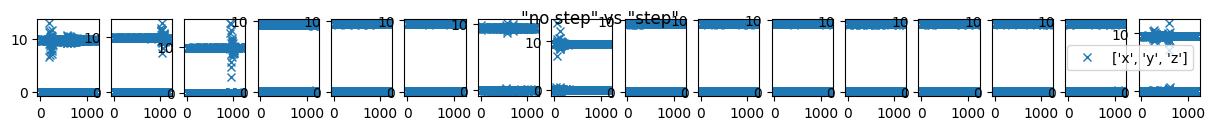

In [3]:
# plot some data
importlib.reload(steps)

plt.close('all')
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16) = plt.subplots(1, 16, figsize=(15, 1))
fig.suptitle('"no step" vs "step"')
ax1.plot(X[1], label=['x','y','z'],linestyle="",marker="x")
ax2.plot(X[2], label=['x','y','z'],linestyle="",marker="x")
ax3.plot(X[3], label=['x','y','z'],linestyle="",marker="x")
ax4.plot(X[-131], label=['x','y','z'],linestyle="",marker="x")
ax5.plot(X[-121], label=['x','y','z'],linestyle="",marker="x")
ax6.plot(X[-111], label=['x','y','z'],linestyle="",marker="x")
ax7.plot(X[-101], label=['x','y','z'],linestyle="",marker="x")
ax8.plot(X[-91], label=['x','y','z'],linestyle="",marker="x")
ax9.plot(X[-81], label=['x','y','z'],linestyle="",marker="x")
ax10.plot(X[-71], label=['x','y','z'],linestyle="",marker="x")
ax11.plot(X[-61], label=['x','y','z'],linestyle="",marker="x")
ax12.plot(X[-51], label=['x','y','z'],linestyle="",marker="x")
ax13.plot(X[-41], label=['x','y','z'],linestyle="",marker="x")
ax14.plot(X[-31], label=['x','y','z'],linestyle="",marker="x")
ax15.plot(X[-21], label=['x','y','z'],linestyle="",marker="x")
ax16.plot(X[-1], label=['x','y','z'],linestyle="",marker="x")
plt.legend()
plt.show()

In [4]:
# check model structure
importlib.reload(steps)

model = steps.create_1d_model()
model.summary()

/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-18 09:57:34.912175: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 399, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 397, 6)         │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2382)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,383 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,443 (9.54 KB)

 Trainable params: 2,443 (9.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# train
importlib.reload(steps)

path_name = "model_A"

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

kfold = KFold(n_splits=10, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
results = []
for train, test in kfold.split(X, y):
    model = steps.create_1d_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
			tf.keras.metrics.Precision(name='precision'),
			tf.keras.metrics.Recall(name='recall'),
			tf.keras.metrics.AUC(name='auc')])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    class_weights = dict(enumerate(compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)))
    X_train = np.asarray(X_train).astype('float32')
    X_test = np.asarray(X_test).astype('float32')
    X_val = np.asarray(X_val).astype('float32')
    y_train = np.asarray(y_train).astype('float32')
    y_test = np.asarray(y_test).astype('float32')
    y_val = np.asarray(y_val).astype('float32')
    history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_val, y_val), verbose=0, callbacks=[early_stopping], class_weight=class_weights)
    metrics = model.evaluate(X_test, y_test, return_dict=True)
    print(metrics)
    results.append(metrics)
accuracies = np.array([d['accuracy'] for d in results])
precisions = np.array([d['precision'] for d in results])
recalls = np.array([d['recall'] for d in results])
losses = np.array([d['loss'] for d in results])

os.makedirs("./models", exist_ok=True)
with open('./models/'+path_name+'.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()
    f.write(f'\n> Accuracy: {np.mean(accuracies)} (+- {np.std(accuracies)})\n')
    f.write(f'> Precision: {np.mean(precisions)} (+- {np.std(precisions)})\n')
    f.write(f'> Recall: {np.mean(recalls)} (+- {np.std(recalls)})\n')
    f.write(f'> Loss: {np.mean(losses)} (+- {np.std(losses)})\n')

/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9805 - auc: 0.9509 - loss: 0.1535 - precision: 0.6208 - recall: 0.8878           
{'accuracy': 0.9835329055786133, 'auc': 0.9940438866615295, 'loss': 0.15571251511573792, 'precision': 0.7714285850524902, 'recall': 0.8999999761581421}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0382 - auc: 0.8270 - loss: 0.7896 - precision: 0.0298 - recall: 0.8594             
{'accuracy': 0.04790419340133667, 'auc': 0.8091953992843628, 'loss': 0.784399688243866, 'precision': 0.040909089148044586, 'recall': 0.8999999761581421}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0704 - auc: 0.6278 - loss: 0.7694 - precision: 0.0280 - recall: 0.7953             
{'accuracy': 0.08233533054590225, 'auc': 0.6873824596405029, 'loss': 0.7641406059265137, 'precision': 0.03949446976184845, 'recall': 0.8333333134651184}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9723 - auc: 0.9207 - loss: 0.3036 - precision: 0.6503 - recall: 0.3673           
{'accuracy': 0.9640718698501587, 'auc': 0.9588557481765747, 'loss': 0.307107537984848, 'precision': 0.800000011920929, 'recall': 0.2666666805744171}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9770 - auc: 0.6870 - loss: 0.4443 - precision: 0.8949 - recall: 0.3298             
{'accuracy': 0.9655688405036926, 'auc': 0.816823422908783, 'loss': 0.450580894947052, 'precision': 0.8888888955116272, 'recall': 0.2666666805744171}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9594 - auc: 0.7121 - loss: 0.5943 - precision: 0.3042 - recall: 0.1488           
{'accuracy': 0.9580838084220886, 'auc': 0.663636326789856, 'loss': 0.5960099697113037, 'precision': 0.5714285969734192, 'recall': 0.2666666805744171}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9811 - auc: 0.9459 - loss: 0.4584 - precision: 0.6656 - recall: 0.7414           
{'accuracy': 0.9820359349250793, 'auc': 0.9929205179214478, 'loss': 0.4553939402103424, 'precision': 0.78125, 'recall': 0.8333333134651184}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.9744 - auc: 0.8747 - loss: 0.4074 - precision: 0.6914 - recall: 0.3572           
{'accuracy': 0.96257483959198, 'auc': 0.8627481460571289, 'loss': 0.41148316860198975, 'precision': 0.7272727489471436, 'recall': 0.2666666805744171}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - auc: 0.8677 - loss: 0.5117 - precision: 0.4946 - recall: 0.6457             
{'accuracy': 0.9715569019317627, 'auc': 0.957288384437561, 'loss': 0.5100129842758179, 'precision': 0.6666666865348816, 'recall': 0.7333333492279053}


/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/paula/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.9675 - auc: 0.7744 - loss: 0.4423 - precision: 0.5338 - recall: 0.2663           


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_20 (Reshape)            │ (None, 399, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 397, 6)         │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 2382)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │         2,383 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,331 (28.64 KB)

 Trainable params: 2,443 (9.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,888 (19.10 KB)

{'accuracy': 0.9580838084220886, 'auc': 0.7637147307395935, 'loss': 0.4475982189178467, 'precision': 0.625, 'recall': 0.1666666716337204}


In [8]:
# convert to tflite
importlib.reload(steps)

import tensorflow as tf
import os

model.save('model.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
converter.experimental_enable_resource_variables = True
tflite_model = converter.convert()

# testen des Modells
accuracy,precision,recall = steps.test_tflite(tflite_model, X_test, y_test)

# speichere das tflite modell
tflite_model_path = 'model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# printe die größe des tflite modells
tflite_model_size = os.path.getsize(tflite_model_path) / 1024  # KB
print(f"\nTFLite model size: {tflite_model_size:.2f} KB")

# funktion um das tflite modell in ein c array zu konvertieren(?)
def convert_to_c_array(file_path, output_file):
    with open(file_path, "rb") as f:
        data = f.read()
    
    data_length = len(data)
    
    with open(output_file, "w") as f:
        f.write(f"unsigned char model_tflite[] = {{\n")
        for i, byte in enumerate(data):
            f.write(f"0x{byte:02x}, ")
            if (i + 1) % 12 == 0:
                f.write("\n")
        f.write(f"\n}};\n\n")
        f.write(f"unsigned int model_tflite_len = {data_length};\n")

# Convert the TFLite model to a C array
convert_to_c_array(tflite_model_path, "model.h")
print('tflite: acc={:f}, prec={:f}, reca={:f}'.format(accuracy,precision,recall))

INFO:tensorflow:Assets written to: /tmp/tmpnwuul8bl/assets


INFO:tensorflow:Assets written to: /tmp/tmpnwuul8bl/assets


Saved artifact at '/tmp/tmpnwuul8bl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1197), dtype=tf.float32, name='keras_tensor_220')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138171137931424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138171145333472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138171162515536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138171162523632: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model:

TFLite model size: 13.30 KB
tflite: acc=0.958084, prec=0.625000, reca=0.166667


W0000 00:00:1726646487.178051   12208 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1726646487.178069   12208 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-09-18 10:01:27.178291: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpnwuul8bl
2024-09-18 10:01:27.178567: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-09-18 10:01:27.178577: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpnwuul8bl
2024-09-18 10:01:27.180853: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-09-18 10:01:27.181250: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-09-18 10:01:27.199150: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpnwuul8bl
2024-09-18 10:01:27.205335: I tensorflow/cc/saved_model/loader.cc

In [9]:
# test how trained model behaves

importlib.reload(steps)

dataset1 = steps.load_dataset('xtra_data')
X1, y1 = steps.prepare_data_for_tensorflow(dataset1)
predictions = model.predict(X1)
accuracy,precision,recall = steps.test_tflite(tflite_model, X1, y1)

plt.close('all')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.suptitle('"no step" vs "step"')
ax1.plot(X1[0], label=['x'],linestyle="",marker="x")
ax2.plot(X1[1], label=['x'],linestyle="",marker="x")
ax3.plot(X1[2], label=['x'],linestyle="",marker="x")
ax4.plot(X1[3], label=['x'],linestyle="",marker="x")
ax5.plot(X1[4], label=['x'],linestyle="",marker="x")
plt.legend()
plt.show()

pos = 0
neg = 0
for i in range(y1.shape[0]):
    predictions = model.predict(np.reshape(X1[i]/10,(1,1197)))
    if predictions[0]>0.65:
        pos += 1
        print(predictions)
    else:
        neg += 1
print('negative: {:d}\npositive: {:d}'.format(neg,pos))

input = np.full((1,1197), 0.3)
pos = 0
neg = 0
for i in range(y.shape[0]):
    if y[i] == 1.0:
        predictions = model.predict(np.reshape(X[i]/10,(1,1197)))
        if predictions[0]>0.82:
            pos += 1
        else:
            neg += 1
        print('negative: {:d} positive: {:d}'.format(neg,pos))

RuntimeError: the dataset's directory does not exist